Import data

In [21]:
import os, os.path
import pandas as pd
from xml.dom import minidom
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
columns_names_df = ["task_name","img_number","usable_img","obj_detected_number","detected_ojects_number"]
df = pd.DataFrame(columns = columns_names_df)
df

,task_name,img_number,usable_img,obj_detected_number,detected_ojects_number


In [ ]:
path = '/home/acarlier/OrnithoMate/p0133_bird_data/annotations/'
tasks_dir = sorted(os.listdir(path))

unwanted_list = ['unknown', 'human', 'noBird']

def get_info_from_xml(xml_path):
    mydoc = minidom.parse(xml_path)
    items = mydoc.getElementsByTagName('object')
    nb_obj = len(items)
    nb_obj_real = 0
    birds = []
    for k in range(nb_obj):
        bird = items[k].childNodes[7].childNodes[1].childNodes[3].childNodes[0].data
        if bird not in unwanted_list:
            birds.append(bird)
            nb_obj_real += 1
        if bird == '1L':
            print(xml_path)
            
    return nb_obj_real, birds


total_img = 0
total_obj = 0
total_obj_dict = {}
for i in range(len(tasks_dir)):
    # Pour chaque tâche
    task_name = tasks_dir[i]
    
    task_dict = {}
    
    complete_path = path + task_name + '/Annotations/bird/' + task_name + '/'
    # Lister toutes les images de la tâche
    image_paths = sorted(os.listdir(complete_path))

    nb_img_real = 0
    nb_obj_real = 0
    for img in range(len(image_paths)):
        nb_obj, birds = get_info_from_xml(complete_path + image_paths[img])
        
        if nb_obj > 0:
            nb_img_real += 1
            nb_obj_real += len(birds)
            
            for b in birds:
                if b in task_dict:
                    task_dict[b] += 1
                else:
                    task_dict[b] = 1
                    
                if b in total_obj_dict:
                    total_obj_dict[b] += 1
                else:
                    total_obj_dict[b] = 1
    
    total_img += nb_img_real
    total_obj += nb_obj_real        
    #print(task_name, len(image_paths), nb_img_real, nb_obj_real, task_dict)
    df = df.append({'task_name': task_name, 'img_number':len(image_paths),
                   'usable_img':nb_img_real,'obj_detected_number':nb_obj_real,'detected_ojects_number':task_dict},ignore_index=True)
print('Total images ', total_img, total_obj, total_obj_dict)


In [8]:
df.head()

,task_name,img_number,usable_img,obj_detected_number,detected_ojects_number
0,task_05-01-2021,948,740,812,"{'MESCHA': 287, 'SITTOR': 182, 'MESBLE': 69, '..."
1,task_06-01-2021,324,225,268,"{'MESBLE': 22, 'MESCHA': 135, 'SITTOR': 32, 'M..."
2,task_18-01-2021,297,244,245,"{'MESNON': 73, 'ROUGOR': 5, 'MESBLE': 91, 'MES..."
3,task_19-01-2021,737,543,554,"{'MESCHA': 344, 'MESNON': 79, 'MESBLE': 74, 'R..."
4,task_2021-03-01_07,162,124,130,"{'MESBLE': 6, 'MESCHA': 17, 'VEREUR': 107}"


<Figure size 1008x1008 with 0 Axes>

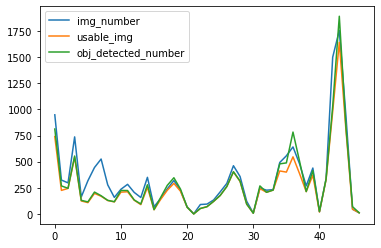

In [43]:
plt.figure(figsize=(14,14));
df.plot();